In [2]:
import csv
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
id_class = []
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        id_class.append((int(id1), cls1));
        id_class.append((int(id2), cls2));
id_class.sort(key = lambda x: x[0])

#key is id, value is occurances
id_occurances = {} #dictionary so I can search for keys
for i in id_class:
    if i[0] in id_occurances:
        id_occurances[i[0]] += 1
    else:
        id_occurances[i[0]] = 1
#print(id_occurances)

#key is tuple from id_class, value is occurances
id_class_occurances = {}
for i in id_class:
    if i in id_class_occurances:
        id_class_occurances[i] += 1
    else:
        id_class_occurances[i] = 1

#sort based on id (the first value in the tuple) in id_class_occurances
sorted(id_class_occurances, key = lambda x: x[0])

#write id_class_occurances to a file
f = open("data/stats/id-class-occurances.txt", "w")
for key in id_class_occurances.keys():
    f.write(str(key[0]) + "\t" + str(key[1]) + "\t" + str(id_class_occurances[key]) + "\n")
f.close()

^^ I ran `sort -n id-class-occurances.txt | cut -f1 |uniq | wc -l` and `sort -n id-class-occurances.txt | cut -f1 | wc -l` in a bash and got 327 for both, so that means that there were no duplicate student IDs, and each student is only ever listed under one class in both the metadata and dynamic contacts.

In [4]:
with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    i = 0
    for t, id1, id2, cls1, cls2 in reader:
        i += 1
        if cls1 != cls2:
            print(str(i) + " " + str(t))

810 1385982380
851 1385982400
895 1385982420
896 1385982420
1090 1385982500
1143 1385982520
1184 1385982540
1244 1385982560
1250 1385982560
1288 1385982580
1295 1385982580
1301 1385982580
1315 1385982600
1318 1385982600
1319 1385982600
1329 1385982600
1331 1385982600
1344 1385982600
1351 1385982600
1360 1385982600
1366 1385982620
1367 1385982620
1371 1385982620
1381 1385982620
1383 1385982620
1407 1385982620
1440 1385982640
1473 1385982660
1476 1385982660
1494 1385982660
1519 1385982680
1521 1385982680
1530 1385982680
1531 1385982680
1536 1385982680
1554 1385982680
1565 1385982700
1566 1385982700
1569 1385982700
1584 1385982700
1590 1385982700
1610 1385982700
1616 1385982720
1617 1385982720
1625 1385982720
1629 1385982720
1630 1385982720
1638 1385982720
1662 1385982740
1663 1385982740
1669 1385982740
1670 1385982740
1674 1385982740
1677 1385982740
1689 1385982740
1692 1385982740
1695 1385982760
1696 1385982760
1698 1385982760
1708 1385982760
1711 1385982760
1715 1385982760
1722 1385982

40676 1386061220
40679 1386061220
40688 1386061220
40699 1386061240
40700 1386061240
40701 1386061240
40708 1386061240
40714 1386061240
40717 1386061240
40723 1386061240
40730 1386061240
40731 1386061240
40737 1386061240
40738 1386061240
40744 1386061240
40745 1386061240
40752 1386061240
40755 1386061240
40759 1386061240
40762 1386061260
40768 1386061260
40774 1386061260
40778 1386061260
40786 1386061260
40787 1386061260
40793 1386061260
40801 1386061260
40808 1386061260
40811 1386061260
40812 1386061260
40818 1386061260
40821 1386061260
40833 1386061280
40837 1386061280
40844 1386061280
40845 1386061280
40846 1386061280
40854 1386061280
40856 1386061280
40860 1386061280
40870 1386061280
40872 1386061280
40876 1386061280
40879 1386061280
40880 1386061280
40883 1386061280
40894 1386061280
40895 1386061280
40900 1386061280
40904 1386061280
40905 1386061280
40918 1386061300
40922 1386061300
40924 1386061300
40926 1386061300
40927 1386061300
40950 1386061300
40955 1386061300
40956 13860613

72519 1386083460
72570 1386083500
72729 1386083560
72744 1386083580
72751 1386083580
72756 1386083580
72757 1386083580
72774 1386083580
72789 1386083580
72795 1386083600
72797 1386083600
72804 1386083600
72805 1386083600
72846 1386083620
72856 1386083620
72857 1386083620
72865 1386083620
72903 1386083640
72908 1386083640
72917 1386083640
72918 1386083640
72919 1386083640
72925 1386083640
72968 1386083660
72970 1386083660
72975 1386083660
72987 1386083660
73000 1386083660
73016 1386083660
73017 1386083660
73034 1386083680
73036 1386083680
73058 1386083680
73059 1386083680
73082 1386083680
73111 1386083700
73128 1386083700
73129 1386083700
73142 1386083700
73143 1386083700
73144 1386083700
73170 1386083720
73173 1386083720
73176 1386083720
73189 1386083720
73223 1386083740
73244 1386083740
73251 1386083740
73265 1386083740
73283 1386083760
73284 1386083760
73285 1386083760
73286 1386083760
73303 1386083760
73304 1386083760
73343 1386083780
73344 1386083780
73356 1386083780
73359 13860837

109691 1386163120
109763 1386163200
109781 1386163220
109829 1386163280
109830 1386163280
109847 1386163300
109864 1386163320
109882 1386163340
109920 1386163380
109979 1386163460
109993 1386163480
110016 1386163520
110077 1386163600
110078 1386163600
110105 1386163640
110166 1386163760
110182 1386163780
110194 1386163800
110207 1386163820
110218 1386163840
110228 1386163860
110241 1386163880
110291 1386163960
110316 1386164000
110427 1386164180
110439 1386164200
110465 1386164240
110481 1386164260
110496 1386164280
110497 1386164280
110510 1386164300
110577 1386164400
110909 1386165000
110925 1386165020
110946 1386165040
111128 1386165260
111141 1386165280
111155 1386165300
111170 1386165320
111185 1386165340
111203 1386165360
111233 1386165400
111258 1386165440
111270 1386165460
111286 1386165480
111302 1386165500
111341 1386165540
111425 1386165660
111439 1386165680
111462 1386165700
111483 1386165720
111505 1386165740
111508 1386165740
111523 1386165760
111527 1386165760
111572 138

154294 1386313680
154315 1386313700
154368 1386313740
154636 1386313980
154659 1386314000
155180 1386314500
156003 1386315360
156025 1386315380
157970 1386317100
157997 1386317120
158331 1386317360
159531 1386318340
161001 1386319520
161118 1386319600
161994 1386320120
162038 1386320140
162040 1386320140
162066 1386320140
162099 1386320160
162109 1386320160
162110 1386320160
162111 1386320160
162124 1386320160
162134 1386320160
162150 1386320160
162159 1386320180
162160 1386320180
162172 1386320180
162173 1386320180
162174 1386320180
162191 1386320180
162193 1386320180
162205 1386320180
162227 1386320200
162228 1386320200
162230 1386320200
162231 1386320200
162232 1386320200
162237 1386320200
162239 1386320200
162246 1386320200
162248 1386320200
162254 1386320200
162260 1386320200
162261 1386320200
162264 1386320220
162275 1386320220
162278 1386320220
162279 1386320220
162295 1386320220
162297 1386320220
162298 1386320220
162299 1386320220
162306 1386320220
162315 1386320240
162323 138

^^ I want to know when people are in contact with people not in their class

In [5]:
friendships = [] #list of tuples from friendship data
with open("data/original/Friendship-network_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for id1, id2 in reader:
        friendships.append((int(id1), int(id2)));

mutual_friendships = {} #key is touple of (smaller id, bigger id), value is whether or not it's mutual
for i in friendships:
    isMutual = (i[1], i[0]) in friendships #we know (i[0], i[1]) is already in the list
    friendship_id = (min(i), max(i))
    if not (friendship_id in mutual_friendships): #only adding pair of IDs once, and not when the conjugate is found again
        mutual_friendships[friendship_id] = isMutual
    
#     friendship_id = (min(i), max(i))
#     if (friendship_id in mutual_friendships):
#         mutual_friendships[friendship_id] = True
#     else:
#         mutual_friendships[friendship_id] = False

#write mutual_friendships to a file
# f = open("data/stats/mutual-friendships2.txt", "w")
# for key in mutual_friendships.keys():
#     f.write(str(key[0]) + "\t" + str(key[1]) + "\t" + str(mutual_friendships[key]) + "\n")
# f.close()
print("finished")

finished


^^ I want to know how many of the listed friendships are mutual

In [6]:
G=nx.DiGraph()
Gu = nx.Graph()

for i in friendships:
    G.add_edge(i[0], i[1])
    Gu.add_edge(i[0], i[1])
    Gu.add_edge(i[1], i[0])
    
print("V =",G.number_of_nodes())
print("E =",G.number_of_edges())

cc = nx.clustering(G)
degree = G.degree()
bc = nx.betweenness_centrality(G)

nx.set_node_attributes(G, cc, "clustering_coefficient")
nx.set_node_attributes(G, degree, "degree")
nx.set_node_attributes(G, bc, "betweenness_centrality")
dcent = nx.degree_centrality(G)

V = 134
E = 668


^^ Making the graph and doing calculations

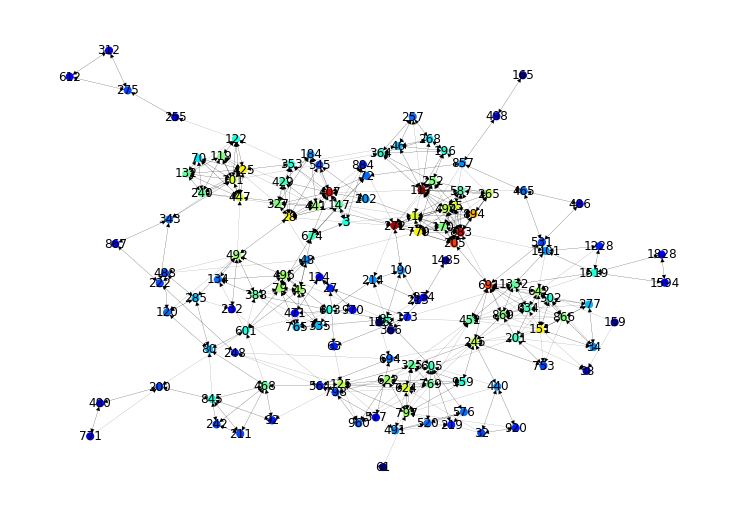

In [11]:
#%matplotlib notebook

#print(dcent)
mx = dcent[max(dcent.keys(), key=(lambda k: dcent[k]))]
mn = dcent[min(dcent.keys(), key=(lambda k: dcent[k]))]

dcent_color = [plt.cm.jet((dcent[i] - mn)/(mx - mn)) for i in dcent]

bcent = nx.betweenness_centrality(G)
bcent_color = [bcent[i] for i in bcent]

ccent = nx.closeness_centrality(G)
ccent_color = [dcent[i] for i in ccent]


plt.figure(1, figsize=(10, 7))
nx.draw_kamada_kawai(G,with_labels=True,node_size=50,node_color=dcent_color,width=0.1)

plt.show()

^^ Coloring the graph based on degree centrality

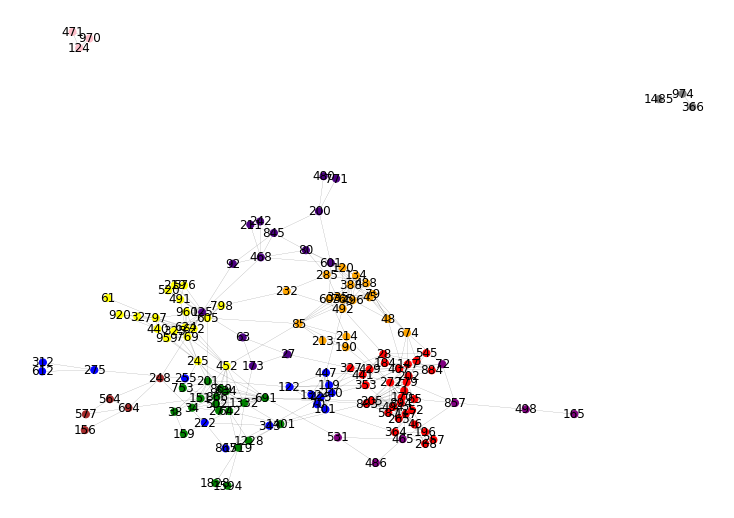

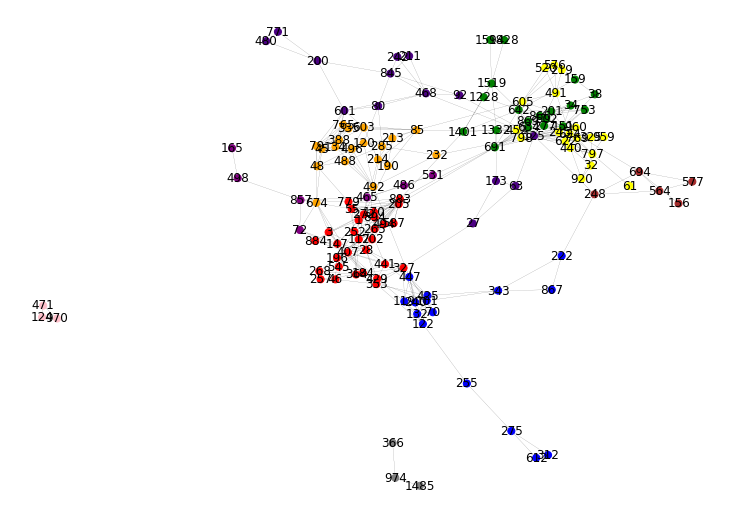

In [25]:
from networkx.algorithms.community import greedy_modularity_communities
c = nx.algorithms.community.greedy_modularity_communities(Gu)
nodes_list = list(Gu.nodes())
community_color = [""] * len(nodes_list)
community_index = 0

for community in c:
    for student in community:
        if community_index == 0:
            community_color[nodes_list.index(student)] = "red"
        elif community_index == 1:
            community_color[nodes_list.index(student)] = "orange"
        elif community_index == 2:
            community_color[nodes_list.index(student)] = "yellow"
        elif community_index == 3:
            community_color[nodes_list.index(student)] = "green"
        elif community_index == 4:
            community_color[nodes_list.index(student)] = "blue"
        elif community_index == 5:
            community_color[nodes_list.index(student)] = "indigo"
        elif community_index == 6:
            community_color[nodes_list.index(student)] = "purple"
        elif community_index == 7:
            community_color[nodes_list.index(student)] = "brown"
        elif community_index == 8:
            community_color[nodes_list.index(student)] = "pink"
        elif community_index == 9:
            community_color[nodes_list.index(student)] = "gray"
    community_index += 1


# plt.figure(1, figsize=(10, 7))
# nx.draw_kamada_kawai(Gu,with_labels=True,node_size=50,node_color=community_color,width=0.1)

plt.figure(2, figsize=(10, 7))
pos = nx.drawing.layout.spring_layout(Gu)
nx.draw(Gu, pos, with_labels=True,node_size=50,node_color=community_color,width=0.1)

plt.figure(4, figsize=(10, 7))
pos = nx.drawing.layout.spring_layout(Gu, k=2, iterations=800)
nx.draw(Gu, pos, with_labels=True,node_size=50,node_color=community_color,width=0.1)

# plt.figure(3, figsize=(10, 7))
# nx.draw_circular(Gu,with_labels=True,node_size=50,node_color=community_color,width=0.1)

plt.show()


^^ Finding communities and coloring nodes

19
[{1485, 974, 366}, {1828, 1228, 173, 1519, 1401, 1594, 27, 63}, {132, 101, 70, 425, 240, 119, 122, 343, 447}, {1, 257, 265, 779, 268, 272, 170, 46, 55, 196, 587, 205, 857, 364, 494, 883, 117, 252, 894}, {970, 124, 471}, {388, 134, 45, 335, 48, 496, 79, 85, 601, 603, 765}, {353, 674, 3, 545, 327, 72, 202, 429, 147, 884, 407, 184, 441, 28}, {34, 866, 452, 642, 38, 869, 201, 753, 691, 1332, 277, 502, 151, 634, 159}, {214, 213, 190}, {498, 165}, {845, 80, 242, 211, 468, 92}, {867, 222}, {488, 232, 492, 120, 285}, {312, 275, 612, 255}, {32, 960, 769, 325, 440, 622, 624, 61, 125, 245, 920, 797, 798, 959}, {465, 531, 486}, {200, 480, 771}, {576, 520, 491, 219, 605}, {577, 564, 694, 248, 156}]


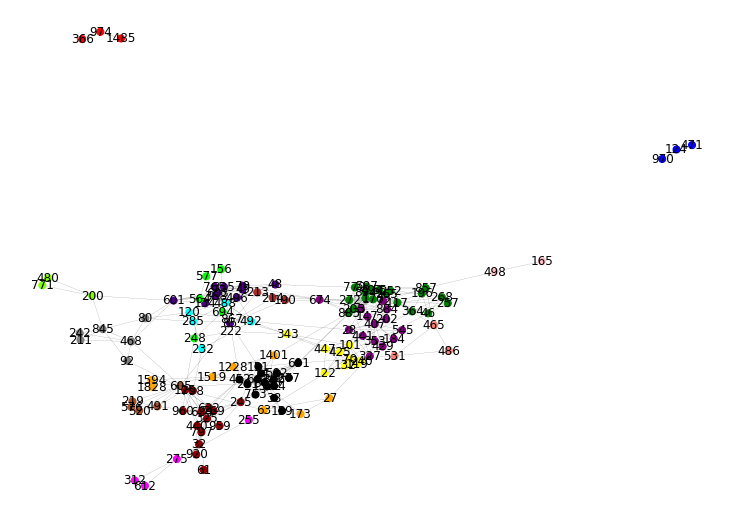

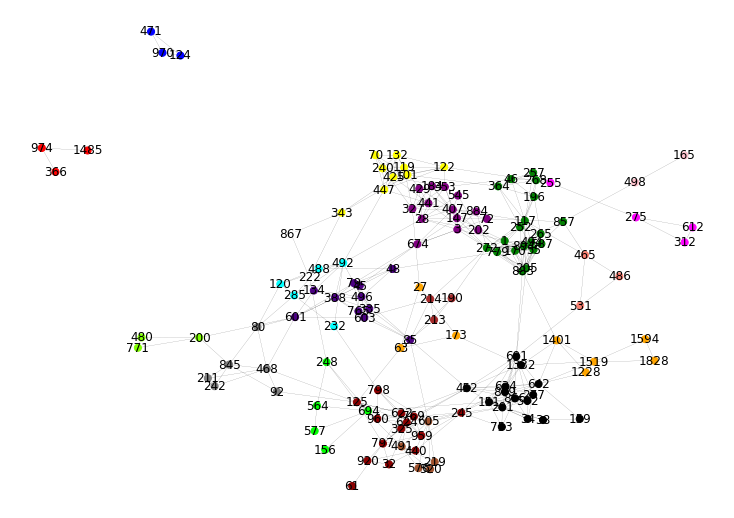

In [30]:
color_list = ["red", "orange", "yellow", "green", "blue", "indigo", "purple", "black", "brown", 
              "pink", "gray", "white", "cyan", "magenta", "darkred", "salmon", "chartreuse", "sienna", "lime"]
c = list(nx.algorithms.community.label_propagation.label_propagation_communities(Gu))
print(len(c))
nodes_list = list(Gu.nodes())
community_color = [""] * len(nodes_list)
community_index = 0
print(c)
for community in c:
    for student in community:
        community_color[nodes_list.index(student)] = color_list[community_index]
    community_index += 1


# plt.figure(1, figsize=(10, 7))
# nx.draw_kamada_kawai(Gu,with_labels=True,node_size=50,node_color=community_color,width=0.1)

plt.figure(2, figsize=(10, 7))
pos = nx.drawing.layout.spring_layout(Gu)
nx.draw(Gu, pos, with_labels=True,node_size=50,node_color=community_color,width=0.1)

plt.figure(4, figsize=(10, 7))
pos = nx.drawing.layout.spring_layout(Gu, k=2, iterations=800)
nx.draw(Gu, pos, with_labels=True,node_size=50,node_color=community_color,width=0.1)

# plt.figure(3, figsize=(10, 7))
# nx.draw_circular(Gu,with_labels=True,node_size=50,node_color=community_color,width=0.1)

plt.show()
